In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import pickle
from collections import OrderedDict
from common.layers import Convolution, MaxPooling, ReLU, Affine, SoftmaxWithLoss,BatchNormalization, Dropout,SimpleConvNet
from common.optimizer import RMSProp


In [2]:
#データ読み込み
train_data = np.load("../1_data/train_data.npy")
#train_data = np.reshape(train_data, (9000,1,28,28))
train_label = np.load("../1_data/train_label.npy")
print("train_data.shape=", train_data.shape)
print("train_label.shape=", train_label.shape)



train_data.shape= (3000, 1, 28, 28)
train_label.shape= (3000, 15)


In [3]:
# 正規化
train_data = (train_data - train_data.min()) / train_data.max()
train_data = train_data.astype('float32')
# print(train_data)

In [4]:
# 配列形式変更
train_data = train_data.reshape(-1, 28*28)
print("train_data.shape=", train_data.shape)

train_data.shape= (3000, 784)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, 
                                                    test_size=0.3, random_state=1234,
                                                    shuffle=True)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2100, 784) (900, 784)
(2100, 15) (900, 15)


In [6]:
train = X_train
test = X_test

train_labels = y_train
test_labels = y_test

train = train.reshape(-1,1,28,28)
test = test.reshape(-1,1,28,28)

print(train.shape, test.shape)

(2100, 1, 28, 28) (900, 1, 28, 28)


In [7]:
#one-hotベクトル作るやつ
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()


In [8]:
x = train
t = train_labels

x = x.reshape(-1,1,28,28) # 配列形式の変形

print(t.shape)
print(x.shape)

(2100, 15)
(2100, 1, 28, 28)


In [9]:
epochs = 50
batch_size = 300

optimizer = RMSProp(lr=0.01, rho=0.9)

# 繰り返し回数
xsize = x.shape[0]
iter_num = np.ceil(xsize / batch_size).astype(np.int)


# CNNのオブジェクト生成
snet = SimpleConvNet(input_dim=(1, 28, 28), 
                     conv_param={'filter_num':30, 'filter_size':5, 'pad':3, 'stride':1},
                     pool_param={'pool_size':2, 'pad':0, 'stride':1},
                     hidden_size=100, output_size=15, weight_init_std=0.01)

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(epochs):
    print("epoch=%s"%epoch)

    # シャッフル
    idx = np.arange(xsize)
    np.random.shuffle(idx)

    for it in range(iter_num):
        """
        ランダムなミニバッチを順番に取り出す
        """
        print("it=", it)
        mask = idx[batch_size*it : batch_size*(it+1)]

        # ミニバッチの生成
        x_train = x[mask]
        t_train = t[mask]

        # 勾配の計算 (誤差逆伝播法を用いる) 
        grads = snet.gradient(x_train, t_train)

        # 更新
        optimizer.update(snet.params, grads)

    ## 学習経過の記録

    # 訓練データにおけるloss
#     print("calculating train_loss")    
    train_loss.append(snet.loss(x,  t))

#     print("calculating test_loss")
    # テストデータにおけるloss
    test_loss.append(snet.loss(test, test_labels))

#     print("calculating train_accuracy")
    # 訓練データにて精度を確認
    train_accuracy.append(snet.accuracy(x, t))
    
#     print("calculating test_accuracy")
    # テストデータにて精度を算出
    test_accuracy.append(snet.accuracy(test, test_labels))

epoch=0
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
epoch=1
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
epoch=2
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
epoch=3
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
epoch=4
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
epoch=5
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
epoch=6
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
epoch=7
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
epoch=8
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
epoch=9
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
epoch=10
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
epoch=11
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
epoch=12
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
epoch=13
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
epoch=14
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
epoch=15
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
epoch=16
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
epoch=17
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
epoch=18
it= 0
it= 1
it= 2
it= 3
it= 4
it= 5
it= 6
epoch=19
it= 0
it= 1
it= 2
it= 3
it= 4
it

In [14]:
with open("katakana_model_Iizuka.pickle", "wb") as f:
    pickle.dump(snet, f)

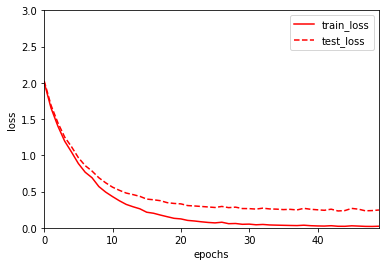

In [10]:
# lossとaccuracyのグラフ化
df_log = pd.DataFrame({"train_loss":train_loss,
             "test_loss":test_loss})

df_log.plot(style=['r-', 'r--'])
plt.ylim([0,3])
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [13]:
with open("katakana_model.pickle", "wb") as f:
    pickle.dump(snet, f)

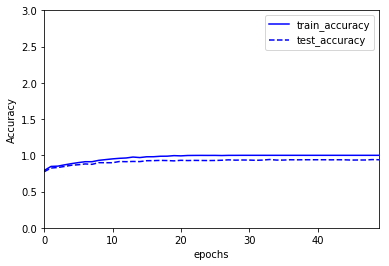

In [11]:
# lossとaccuracyのグラフ化
df_log = pd.DataFrame({"train_accuracy":train_accuracy,
             "test_accuracy":test_accuracy})

df_log.plot(style=['b-', 'b--'])
plt.ylim([0,3])
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.show()

In [12]:
print(test_accuracy)

with open("katakana_model.pickle", "wb") as f:
    pickle.dump(snet, f)

[0.7733333333333333, 0.8244444444444444, 0.8322222222222222, 0.8466666666666667, 0.8633333333333333, 0.87, 0.8811111111111111, 0.8755555555555555, 0.8988888888888888, 0.8977777777777778, 0.8977777777777778, 0.9144444444444444, 0.9122222222222223, 0.9155555555555556, 0.9133333333333333, 0.9255555555555556, 0.9266666666666666, 0.93, 0.9277777777777778, 0.9233333333333333, 0.9311111111111111, 0.9277777777777778, 0.93, 0.9288888888888889, 0.9277777777777778, 0.9288888888888889, 0.9322222222222222, 0.9377777777777778, 0.9333333333333333, 0.9355555555555556, 0.9344444444444444, 0.9311111111111111, 0.9344444444444444, 0.9422222222222222, 0.9344444444444444, 0.9344444444444444, 0.9388888888888889, 0.9377777777777778, 0.9388888888888889, 0.9388888888888889, 0.9388888888888889, 0.9388888888888889, 0.9377777777777778, 0.9388888888888889, 0.9377777777777778, 0.9344444444444444, 0.9355555555555556, 0.9355555555555556, 0.9411111111111111, 0.9388888888888889]
